In [1]:
#知识点
#1.截取某年全部数据
#2.对列进行统计
#3.柱状图
#4.饼图
#5.玫瑰图
#其中气泡云图用Tableau制作


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_new=pd.read_excel("D:/2022_py_code/chap2数据/03_newDate.xlsx",sheet_name='Sheet1',index_col=0)

In [4]:
df_new.index=df_new['date']
#把索引值修改为日期

In [5]:
df_2020=df_new["2020-01-01":"2020-12-31"]
#截取2020年的全部数据

In [6]:
print(df_2020.head(20))

                  date  maxTem  minTem weather wind_direction wind_speed
date                                                                    
2020-01-01  2020-01-01      20      15      多云             东风         2级
2020-01-02  2020-01-02      21      16    多云转晴             东风         2级
2020-01-03  2020-01-03      22      16      多云            东南风         2级
2020-01-04  2020-01-04      25      17       阴            东南风         2级
2020-01-05  2020-01-05      25      17      多云             东风         2级
2020-01-06  2020-01-06      25      18    晴转多云             东风         3级
2020-01-07  2020-01-07      26      19    晴转多云            东南风         2级
2020-01-08  2020-01-08      26      17      多云             东风         2级
2020-01-09  2020-01-09      23      18      多云             东风         2级
2020-01-10  2020-01-10      24      18       晴            东南风         2级
2020-01-11  2020-01-11      25      17    晴转多云             北风         2级
2020-01-12  2020-01-12      18      13      多云     

In [7]:
df_weather_2020=df_2020['weather'].value_counts()
#对2020年的weather列进行统计

In [8]:
print(df_weather_2020)

多云        164
晴          86
阴          46
晴转多云       19
多云转雨       10
多云转晴        8
小雨          8
阴转雨         6
多云转阴        4
小雨到中雨       4
阴转多云        3
小雨转雨        2
阴到小雨        2
中雨转雨        1
小雨到大雨       1
大雨转雨        1
暴雨到暴风雨      1
Name: weather, dtype: int64


In [9]:
#实现x轴坐标竖排展示（非90°）
label_list=df_weather_2020.index.tolist()
#index.tolist 返回一个值列表
label=[]
for i in range(len(label_list)):
    label_vertical=[]#vertical是垂直的意思
    for j in range(len(label_list[i])):
        label_vertical.append(label_list[i][j]+"\n")#每个中文加入换行符，实现竖排显示
    label.append(''.join(label_vertical))#将列表转换为字符串

In [10]:
sns.set(font_scale=1.5,font='SimHei',style='white')#设置字体大小为1.5，字体颜色为黑体，背景色为白色

In [11]:
plt.figure(figsize=(80,20))

<Figure size 5760x1440 with 0 Axes>

<Figure size 5760x1440 with 0 Axes>

<BarContainer object of 17 artists>

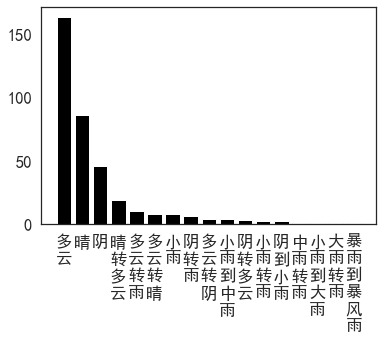

In [12]:
#绘制柱状图
plt.bar(label,df_weather_2020.values,color='black')

In [13]:
#绘制饼图
#准备工作
sizes=df_new["wind_direction"].value_counts()#统计风向
labels=sizes.index
sns.set(font_scale=1,font='SimHei')#黑体，字号为1
plt.style.use('grayscale')#将图片设置为灰度图
plt.figure(figsize=(250,160))

<Figure size 18000x11520 with 0 Axes>

<Figure size 18000x11520 with 0 Axes>

<ipython-input-14-23d7e0d0f152>:4: UserWarning: The handle <matplotlib.patches.Wedge object at 0x0000019070956EB0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(bbox_to_anchor=(0.8,1.1),fontsize=10,ncol=3,labels='wind_direction')#用于给图像增加图例


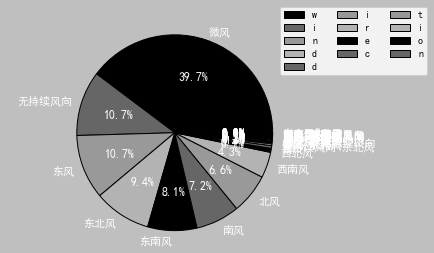

In [14]:
plt.pie(sizes,labels=labels,autopct='%1.1f%%',textprops=dict(color='w'))
#其中的labels是标注，autopct用于显示数字，textprops用于设置字体颜色

plt.legend(bbox_to_anchor=(0.8,1.1),fontsize=10,ncol=3,labels='wind_direction')#用于给图像增加图例
plt.axis('equal')
plt.show()

In [15]:
#pie最简单版
#plt.pie(sizes,labels=None) #就这一行就够了，其他都不写
##autopct='%1.1f%%',textprops=dict(color='w'))


In [16]:
#风玫瑰图
#准备工作：df_2020,df_direction,df_speed
from windrose import plot_windrose
df_speed=df_2020["wind_speed"].value_counts()

In [17]:
#进行替换,将汉字替换成数字
df_2020.replace({'无持续风向':0,'东北风':45,'东南风':135,'东南偏东风':135,'西南风':225,'西北风':315,'西北偏北风':360,'北风':360,'东风':90,'南风':180,'西风':270,'微风':0,'1级':1,'2级':2,'小于3级':2.5,'3级':'3','3~4级':3.5,'4级':4,'5级':5,'6级':6,'7级':7},inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
df=df_2020[['wind_speed','wind_direction']]#选取需要的风速列和风向列


In [19]:
df1=df.rename(columns={'wind_direction':'direction','wind_speed':'speed'})#改变一下列名称，符合windrose库的命名规则


In [21]:
#plot_windrose(df1,kind='bar')
plot_windrose(df1,kind='pdf',bins=np.arange(0.1,6,1))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''